# Project Introduction
In this project you will be provided with real world data which is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

# Section I : Data Loading
Part I : Load the dataset into the notebook
Part II : Explore and make note of Attribute Information from UCI
Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?
Part IV : What is the ratio of the two classes ? Are they balanced ?

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
# Part I : Load the dataset into the notebook
df = pd.read_csv('banking.csv')

In [66]:
# Part II : Explore and make note of Attribute Information from UCI
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [67]:
#df.groupby(['y','pdays']).size()

In [68]:
# Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?
df.value_counts()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [69]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
default
['unknown' 'no' 'yes']
housing
['yes' 'no' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['cellular' 'telephone']
month
['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
day_of_week
['thu' 'fri' 'tue' 'mon' 'wed']
poutcome
['nonexistent' 'success' 'failure']


In [70]:
# Part IV : What is the ratio of the two classes ? Are they balanced ?
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64


# Section II : Data Cleaning

In [71]:
#Part I : Get the dtypes of all the columns of our dataset
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [72]:
df.shape

(41188, 21)

In [73]:
# Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [74]:
# Make note of the deviation in the dataset compared to the description provided by UCI
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [75]:
# Part IV : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of   

#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()

#df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)
#df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2].values)
#df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3].values)
#df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4].values)
#df.iloc[:,5] = labelencoder.fit_transform(df.iloc[:,5].values)
#df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6].values)
#df.iloc[:,7] = labelencoder.fit_transform(df.iloc[:,7].values)
#df.iloc[:,8] = labelencoder.fit_transform(df.iloc[:,8].values)
#df.iloc[:,9] = labelencoder.fit_transform(df.iloc[:,9].values)
#df.iloc[:,14] = labelencoder.fit_transform(df.iloc[:,14].values)
#df.iloc[:,15] = labelencoder.fit_transform(df.iloc[:,15].values)
#df.iloc[:,16] = labelencoder.fit_transform(df.iloc[:,16].values)
#df.iloc[:,17] = labelencoder.fit_transform(df.iloc[:,17].values)
#df.iloc[:,18] = labelencoder.fit_transform(df.iloc[:,18].values)
#df.iloc[:,19] = labelencoder.fit_transform(df.iloc[:,19].values)

In [76]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [77]:
# missing value
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')
else:
    print("no missing value found")

no missing value found


In [78]:
for column in df.columns:
    print(column,df[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp_var_rate 10
cons_price_idx 26
cons_conf_idx 26
euribor3m 316
nr_employed 11
y 2


# Section III : Exploring data with Group by

In [79]:
df.groupby(['y']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [80]:
job = df.groupby(['job']).mean()
job

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [81]:
df.groupby(['marital']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [82]:
df.groupby(['education']).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


# Section III : Exploratory Data Analysis

In [83]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [84]:
for feature in categorical_features:
    print('The feature is{} and number of categorical are {}'.format(feature,len(df[feature].unique())))


The feature isjob and number of categorical are 12
The feature ismarital and number of categorical are 4
The feature iseducation and number of categorical are 8
The feature isdefault and number of categorical are 3
The feature ishousing and number of categorical are 3
The feature isloan and number of categorical are 3
The feature iscontact and number of categorical are 2
The feature ismonth and number of categorical are 10
The feature isday_of_week and number of categorical are 5
The feature ispoutcome and number of categorical are 3


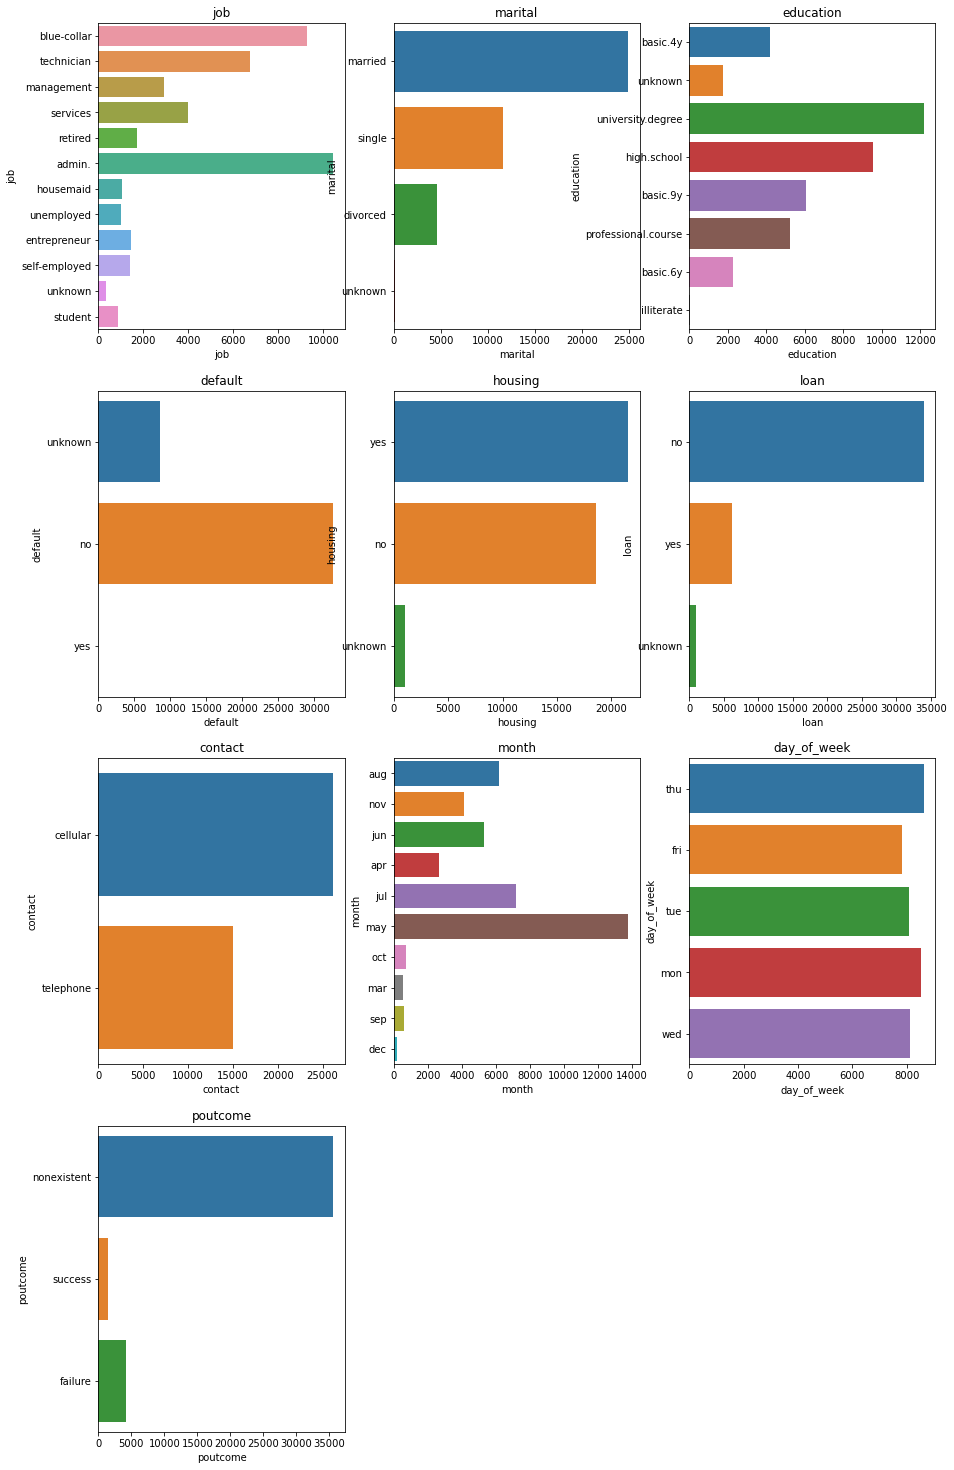

In [85]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

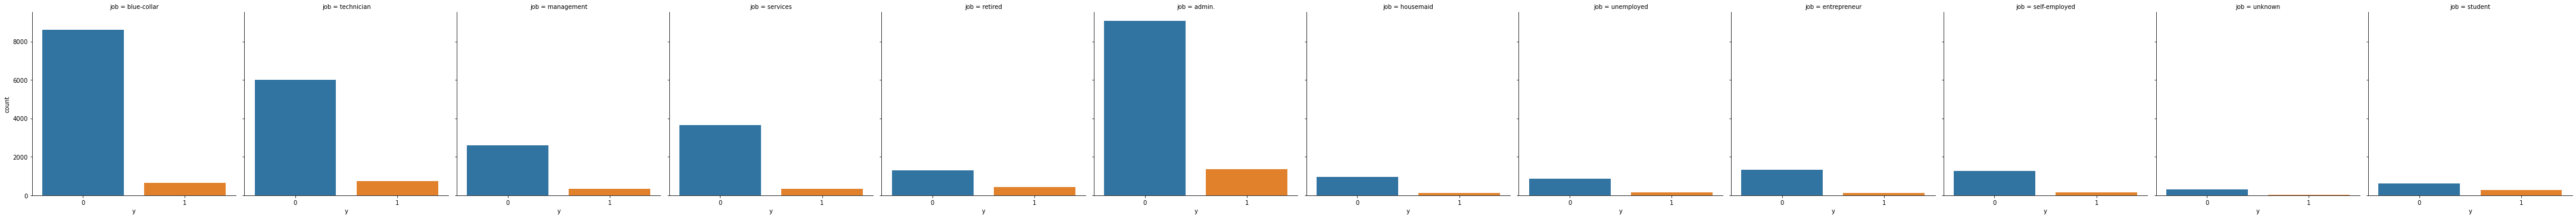

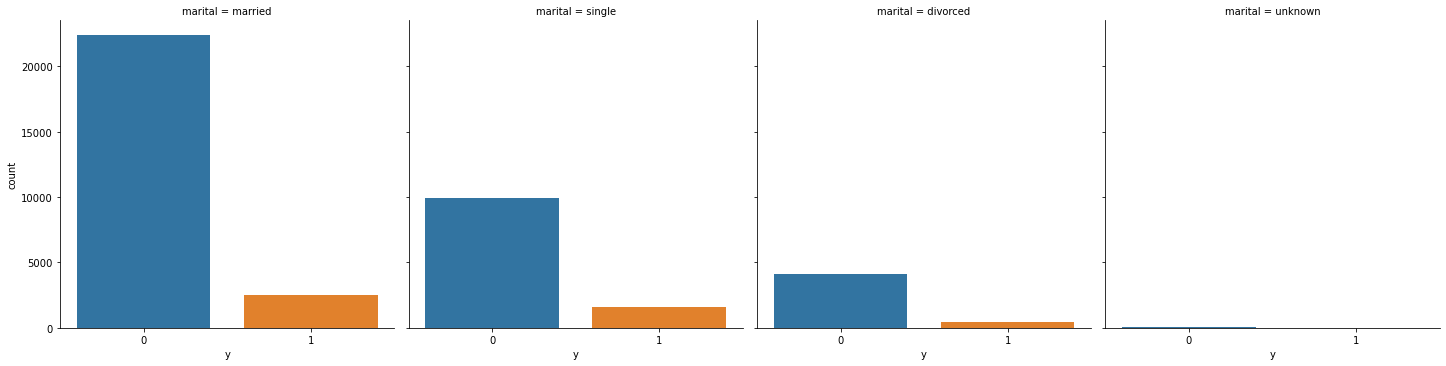

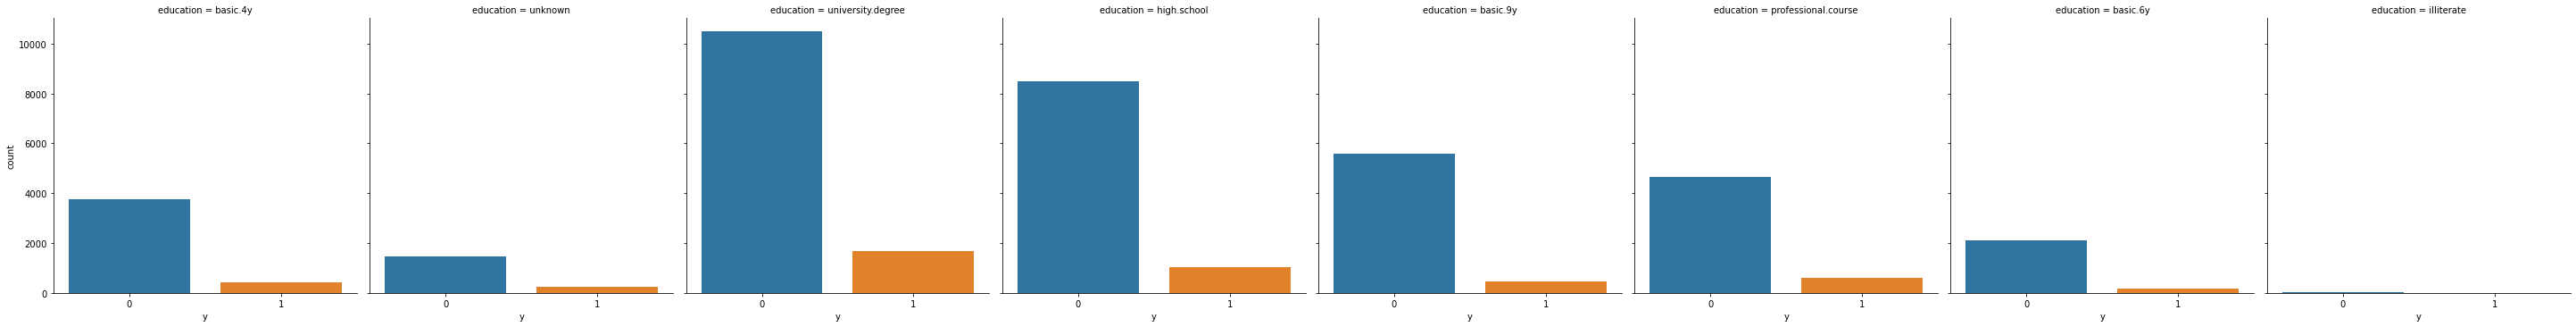

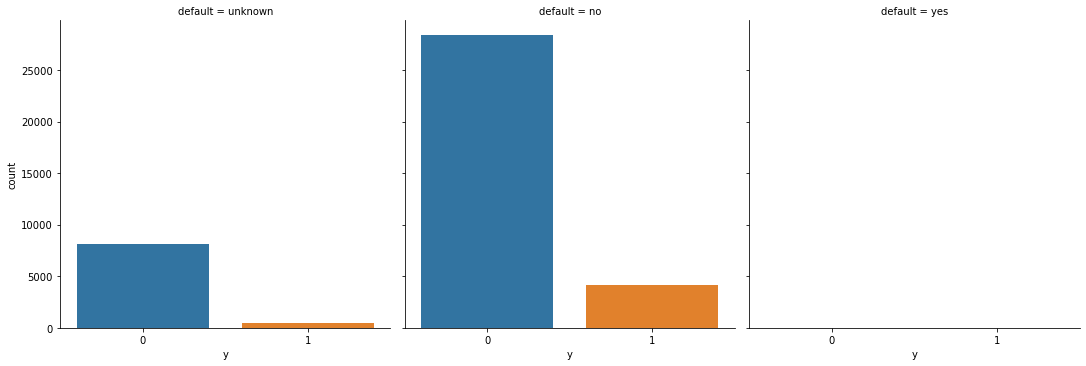

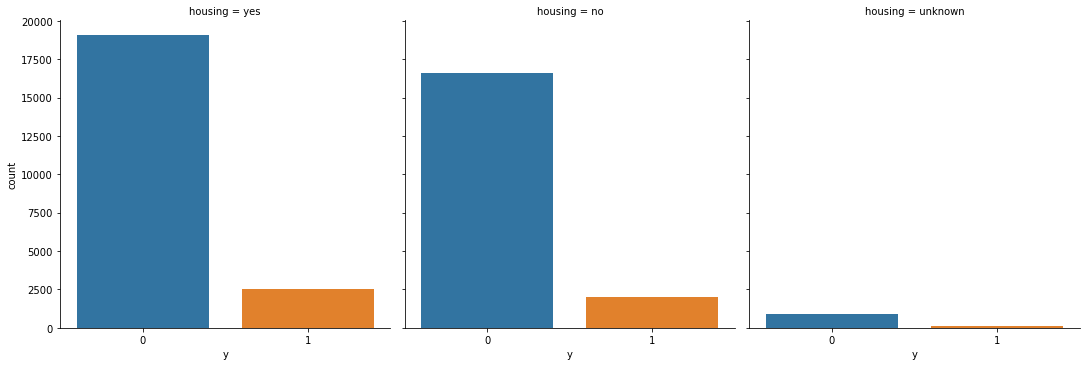

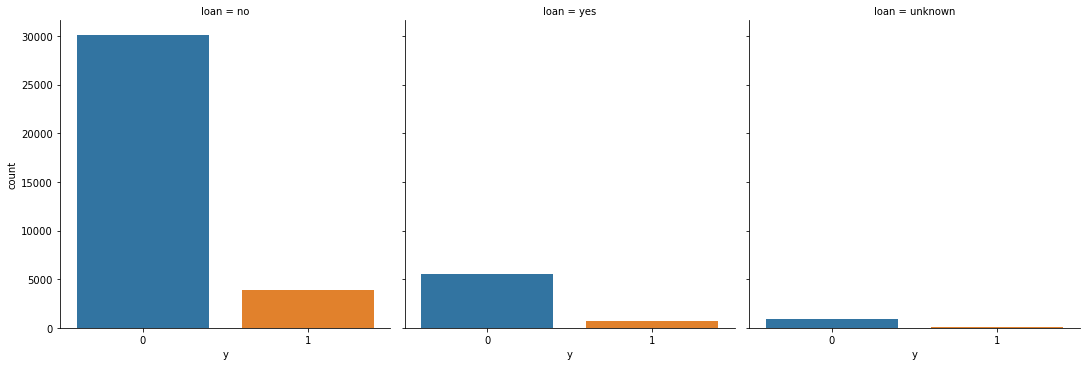

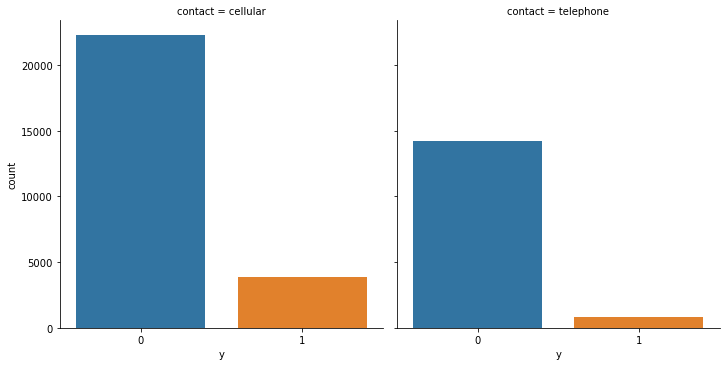

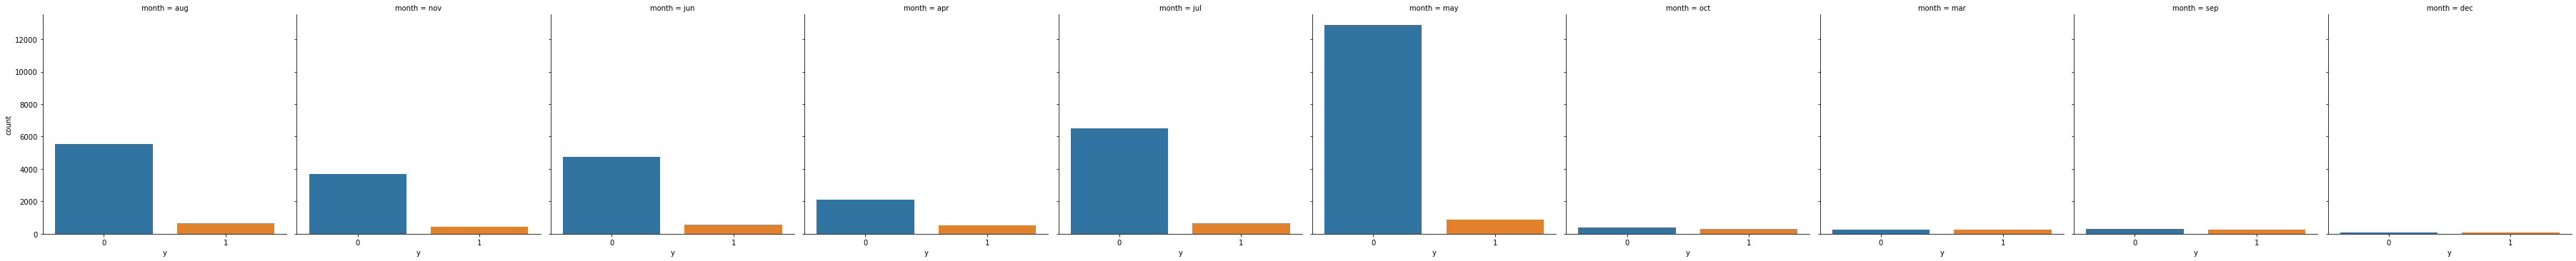

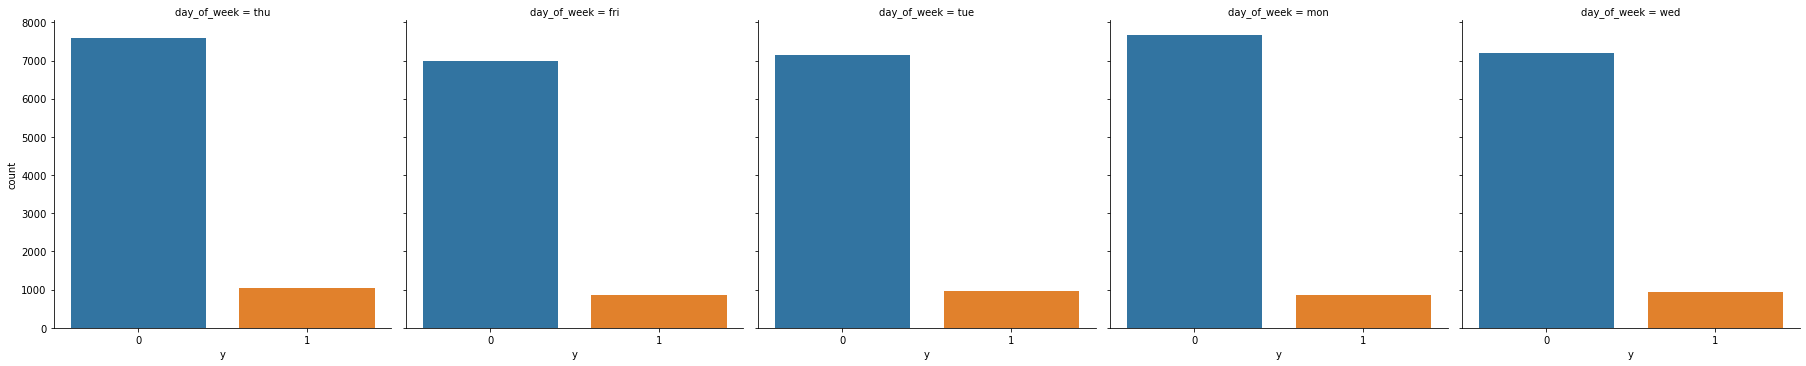

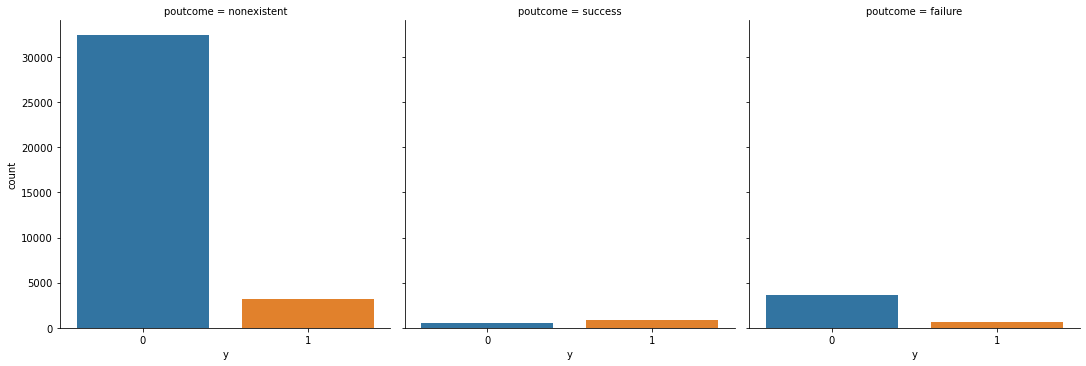

In [86]:
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [87]:
grouped = df.groupby(['marital','y'])['y'].count()
grouped

marital   y
divorced  0     4136
          1      476
married   0    22396
          1     2532
single    0     9948
          1     1620
unknown   0       68
          1       12
Name: y, dtype: int64

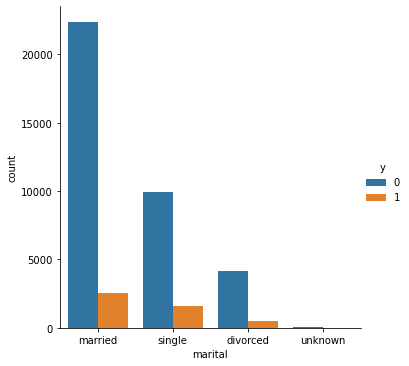

In [88]:
sns.catplot(x='marital',hue='y',kind='count', data=df)
plt.show()

In [89]:
grouped = df.groupby(['age','y'])['y'].count()
grouped

age  y
17   0     3
     1     2
18   0    16
     1    12
19   0    22
          ..
92   0     1
     1     3
94   0     1
95   0     1
98   1     2
Name: y, Length: 150, dtype: int64

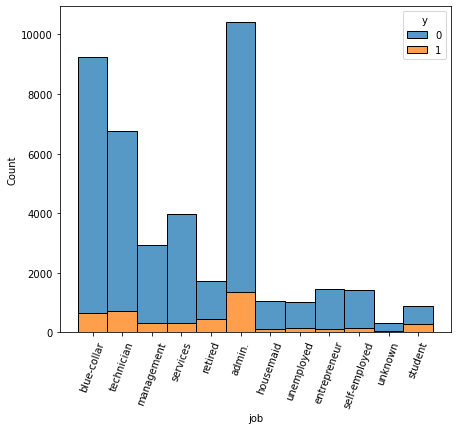

In [90]:
plt.figure(figsize=(7,6))
sns.histplot(x = 'job', hue = 'y', data = df, multiple = 'stack')
plt.xticks(rotation = 70)
plt.show();

In [91]:
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y  job          
0  admin.           9070
   blue-collar      8616
   entrepreneur     1332
   housemaid         954
   management       2596
   retired          1286
   self-employed    1272
   services         3646
   student           600
   technician       6013
   unemployed        870
   unknown           293
1  admin.           1352
   blue-collar       638
   entrepreneur      124
   housemaid         106
   management        328
   retired           434
   self-employed     149
   services          323
   student           275
   technician        730
   unemployed        144
   unknown            37
dtype: int64
y  marital 
0  divorced     4136
   married     22396
   single       9948
   unknown        68
1  divorced      476
   married      2532
   single       1620
   unknown        12
dtype: int64
y  education          
0  basic.4y                3748
   basic.6y                2104
   basic.9y                5572
   high.school             8484
   illiterate             

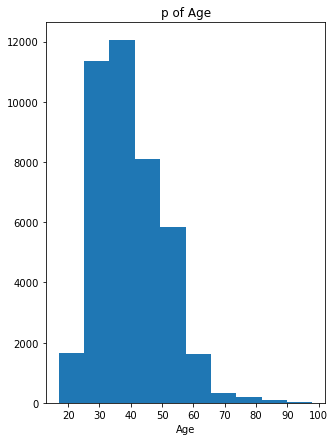

In [92]:
plt.figure(figsize=(5,7))
plt.hist(df['age'])
plt.title("p of Age")
plt.xlabel('Age')
plt.show()

In [93]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [94]:
miss_val = df.isna().sum()
miss_val

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [95]:
df.shape

(41188, 21)

In [96]:
df['y'].groupby(df['y']).count()

y
0    36548
1     4640
Name: y, dtype: int64

In [97]:
for feature in df.columns:
    if df[feature].dtypes == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [98]:
df.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [99]:
# df = df.drop(['pdays','poutcome'], axis = 1)

In [100]:
X=df.drop(['y'],axis = 1)

In [101]:
y=df['y']

In [102]:
X.dtypes

age                 int64
job                  int8
marital              int8
education            int8
default              int8
housing              int8
loan                 int8
contact              int8
month                int8
day_of_week          int8
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome             int8
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
dtype: object

In [103]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [104]:
dummies=pd.get_dummies(data=df,columns=(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']),drop_first=True)
dummies

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_1,poutcome_2
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,0,1,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,1,0,0,0,0,1,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,0,1,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,0,0,1,0,0,0,1,0,1,0


# Section V : Preliminary Training

In [105]:
from sklearn.model_selection import train_test_split
#train_set,test_set, train_label, test_label = train_test_split(X,y, test_size=0.30,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)


In [106]:
print('Dimension of train_x dataframe:',X_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)
print('Dimension of val_x dataframe:',X_test.shape)
print('Dimension of val_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (27595, 20)
Dimension of train_y dataframe: (27595,)
Dimension of val_x dataframe: (13593, 20)
Dimension of val_y dataframe: (13593,)


In [107]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(X_train, y_train) 

C:\Users\haile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model : ", logreg_acc)

Accuracy of the model :  0.9047303759287869


In [110]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred, labels = [0, 1]))
print(metrics.classification_report(y_test, y_pred, labels = [0, 1]))

[[11665   369]
 [  926   633]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12034
           1       0.63      0.41      0.49      1559

    accuracy                           0.90     13593
   macro avg       0.78      0.69      0.72     13593
weighted avg       0.89      0.90      0.90     13593



In [111]:
d = {'Prediction':y_pred}
pred_comp =pd.DataFrame(d)

pred_comp

,Prediction
0,0
1,0
2,1
3,0
4,0
...,...
13588,0
13589,0
13590,0
13591,0


In [112]:
d = {'Prediction':y_pred}
pred_comp =pd.DataFrame(d)
f = y_test.reset_index()
f = f.drop(['index'], axis=1)
df = pd.concat([pred_comp, f], axis=1)
df.head(143)


,Prediction,y
0,0,0
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
138,0,0
139,0,1
140,0,0
141,0,0


In [113]:
f.value_counts()

y
0    12034
1     1559
dtype: int64

In [114]:
pred_comp.value_counts()

Prediction
0             12591
1              1002
dtype: int64

# Section VI : Let's Improve the performance 

In [115]:
from imblearn.over_sampling import SMOTE
import numpy as np
sm = SMOTE(random_state=12, sampling_strategy=0.3)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [116]:
unique, count = np.unique(y_res, return_counts=True)# we can see that its balanced now
value_count = {X:y for (X, y) in zip(unique, count)}
value_count

{0: 24514, 1: 7354}

In [117]:
print('Dimension of train_x dataframe:',X_res.shape)
print('Dimension of train_y dataframe:',y_res.shape)


Dimension of train_x dataframe: (31868, 20)
Dimension of train_y dataframe: (31868,)


In [118]:
np.bincount(y_res)

array([24514,  7354], dtype=int64)


# Section VII : Let us Re-Train!

In [124]:
from sklearn.metrics import classification_report
clf1 = LogisticRegression(random_state=12)
clf1.fit(X_train, y_train)
y_pred1=clf1.predict(X_train)
print(metrics.confusion_matrix(y_train, y_pred1))
print(metrics.classification_report(y_train, y_pred1))

[[23876   638]
 [ 1835  1246]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     24514
           1       0.66      0.40      0.50      3081

    accuracy                           0.91     27595
   macro avg       0.79      0.69      0.73     27595
weighted avg       0.90      0.91      0.90     27595



C:\Users\haile\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_train, y_pred1)
print("Accuracy of the model : ", logreg_acc)

Accuracy of the model :  0.9103823156368908


# Section VII : Let us Re-Train!

In [ ]:
X_test = pd.DataFrame(X_test, columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic 6y', 'education_basic 9y',
       'education_high school', 'education_illiterate',
       'education_professional course', 'education_university degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'])


In [ ]:
X_train = pd.DataFrame(X_res, columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic 6y', 'education_basic 9y',
       'education_high school', 'education_illiterate',
       'education_professional course', 'education_university degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'])
y_train = pd.DataFrame(y_res, columns=['y'])

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

rfe = RFE(estimator=clf1)
rfe = rfe.fit(X_train,y_train)

In [ ]:
features = pd.DataFrame({'Feature':list(X_train.columns), 'Ranking': rfe.ranking_})
features.sort_values(by="Ranking")


In [ ]:
# lets create a list for the best features
#best_features = ['job','pdays','age','duration','education','housing','nr_employed','cons_price_idx','emp_var_rate','cons_conf_idx','previous','campaign','poutcome','euribor3m','month','contact','loan','default','marital','day_of_week']


In [ ]:
#X_train = [best_features]
#X_test =  [best_features]

In [ ]:
# clf = clf1.fit(X_train, y_train)
# y_t_pred = clf.predict(X_test)
# print(metrics.confusion_matrix(y_test, y_t_pred, labels = [0, 1]))
# print(metrics.classification_report(y_test, y_t_pred, labels = [0,1]))

given dataset seems to be balance

1,no missing value

2,no feauter found with value

3,9 categorical feature

4, defult feature does not ply important role

5,it seemes outliers found (age, balance, duration, campgne, pdays has some outliers
